In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import cluster

In [20]:
data = pd.read_csv("bostonh.dat", sep =  "\s+", header = None)

In [21]:
xt = data.copy()

In [22]:
for i in [0,2,4,5,7,8,9,13]:
    xt.iloc[:, i] = np.log(data.iloc[:, i])
xt.iloc[:, 1] = data.iloc[:, 1]/10
xt.iloc[:, 6] = (data.iloc[:, 6]**(2.5))/10000
xt.iloc[:, 10] = np.exp(0.4 * data.iloc[:, 10])/1000
xt.iloc[:, 11] = data.iloc[:, 11]/100
xt.iloc[:, 12] = np.sqrt(data.iloc[:, 12])

data = xt.drop(columns = 3)

In [26]:
da = (data - np.mean(data))/np.std(data)

In [27]:
d = np.zeros([len(da),len(da)])

for i in range(0, len(da)):
    for j in range(0, len(da)):
        d[i, j] = np.linalg.norm(da.iloc[i, :] - da.iloc[j, :])


In [30]:
w = cluster.hierarchy.linkage(d, 'ward')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


In [32]:
tree = cluster.hierarchy.cut_tree(w, n_clusters = 2)

In [52]:
da["c"] = tree
t1 = da[da["c"] == 0].iloc[:, :-1]
t2 = da[da["c"] == 1].iloc[:, :-1]

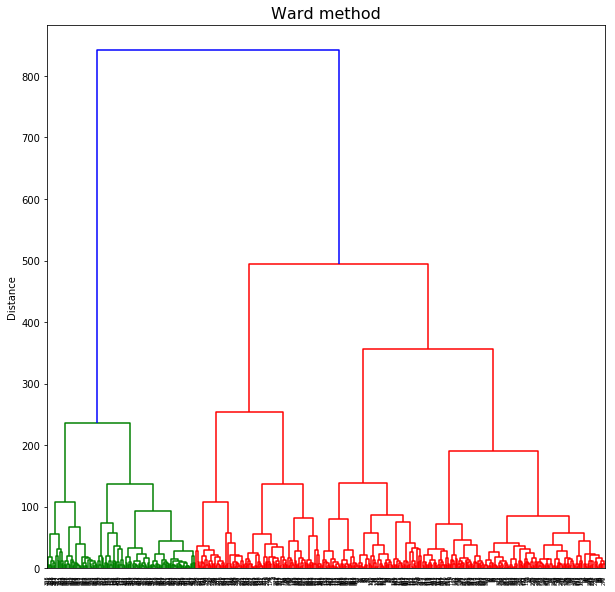

In [39]:
fig, ax = plt.subplots(figsize = (10, 10))
h = cluster.hierarchy.dendrogram(w, labels=None)
plt.title("Ward method", fontsize = 16)
plt.ylabel("Distance")

plt.show()

In [ ]:
# means for Cluster 1 and Cluster 2
mc  = cbind(colMeans(subset(da, tree == "1")), colMeans(subset(da, tree == "2")))

In [49]:
mc = np.concatenate((np.array(np.mean(t1)).reshape(len(t1.columns), 1), 
                     np.array(np.mean(t2)).reshape(len(t2.columns), 1)), axis = 1)

In [50]:
mc

array([[-0.48308205,  1.32758104],
       [ 0.1774731 , -0.48772236],
       [-0.35288832,  0.96978937],
       [-0.46275003,  1.27170564],
       [ 0.19421121, -0.53372118],
       [-0.35997971,  0.98927757],
       [ 0.40269437, -1.10666378],
       [-0.45160644,  1.24108141],
       [-0.46700582,  1.28340118],
       [-0.19994436,  0.54947672],
       [ 0.30807939, -0.84664779],
       [-0.34681253,  0.95309222],
       [ 0.3440715 , -0.94555947]])

In [54]:
np.mean(tree)

0.26679841897233203

In [53]:
t1

,0,1,2,4,5,6,7,8,9,10,11,12,13
0,-1.983228,0.284830,-1.704344,-0.049040,0.458147,-0.456979,0.409104,-2.136989,-0.608739,-1.244027,0.441052,-1.202689,0.351512
1,-1.305639,-0.487722,-0.263239,-0.730942,0.246937,0.131572,0.769562,-1.343886,-1.117412,-0.670455,0.441052,-0.399953,0.093499
2,-1.305978,-0.487722,-0.263239,-0.730942,1.248788,-0.601364,0.769562,-1.343886,-1.117412,-0.670455,0.396427,-1.429933,1.254373
3,-1.226942,-0.487722,-1.778965,-0.848853,1.013781,-1.021941,1.139194,-0.879950,-1.335255,-0.277261,0.416163,-1.726876,1.160867
4,-0.876187,-0.487722,-1.778965,-0.848853,1.201532,-0.813378,1.139194,-0.879950,-1.335255,-0.277261,0.441052,-1.124522,1.358008
5,-1.264465,-0.487722,-1.778965,-0.848853,0.259419,-0.679436,1.139194,-0.879950,-1.335255,-0.277261,0.410571,-1.151025,0.789475
6,-0.762388,0.048772,-0.125137,-0.180034,-0.339589,-0.404427,0.978929,-0.295460,-0.483899,-1.257116,0.426798,0.109459,0.236619
7,-0.534139,0.048772,-0.125137,-0.180034,-0.105523,1.120550,1.104691,-0.295460,-0.483899,-1.257116,0.441052,0.971818,0.649000
8,-0.358498,0.048772,-0.125137,-0.180034,-0.923031,1.386242,1.145274,-0.295460,-0.483899,-1.257116,0.328448,2.081907,-0.566061
9,-0.458947,0.048772,-0.125137,-0.180034,-0.351455,0.499031,1.294662,-0.295460,-0.483899,-1.257116,0.329325,0.727588,-0.233501
